In [21]:
import pandas as pd

df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['price'])
df['price'] = le.transform(df['price'])

In [24]:
X = df.drop(['price'], axis = 1)
y = df['price']
print(X)
print(y)

               id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 20 columns]
0         349
1        2091
2         180
3        2373
4        1967
         ... 
21608    1172
21609    1399
21610    1408
21611    1399
21612     958
Name: price, Le

In [25]:
# this part of the code is not implemented in whole of the process or you can say that is not included
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data


pipe.score(X_test, y_test)
# here in the above line we are spliting the data set and training and testting it 
# the major thing of that is we are taking the 70 percent of the data randomly and that is being tested randomly

0.9333333333333333

In [31]:
  # apply scaling on testing data, without leaking training data.


0.96

In [26]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.7043110816306345


In [27]:
y_pred = regr.predict(X_train)

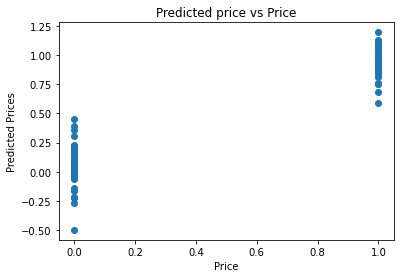

In [28]:
# visulizing the difference between actual prices and the predicted priices

plt.scatter(y_train, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Prices')
plt.title('Predicted price vs Price')
plt.show()










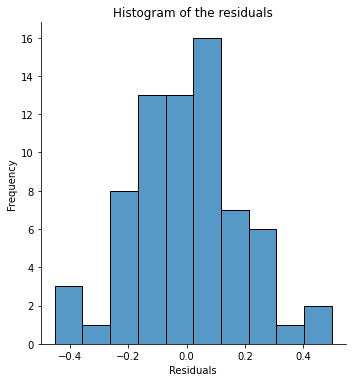

In [29]:
# linear regression checking out the normality of the errors:


sns.displot(y_train-y_pred)
plt.title('Histogram of the residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [30]:
y_test_pred = regr.predict(X_test)

In [31]:
from sklearn import metrics
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2 :', acc_linreg)
print('Adjusted R^2:', 1-(1-metrics.r2_score(y_test,y_test_pred))* len((y_test) - 1)/ (len(y_test) - X_test.shape[1]-1))
print('MAE', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2 : 0.7043110816306345
Adjusted R^2: 0.014370272102115056
MAE 0.21669572932348785
MSE 0.07260805662181084
RMSE 0.2694588217554045


In [32]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = reg.predict(X_train)

In [34]:
from sklearn import metrics
acc_linreg = metrics.r2_score(y_train, y_pred)
print('R^2 :', acc_linreg)
print('Adjusted R^2:', 1-(1-metrics.r2_score(y_train,y_pred))* len((y_train) - 1)/ (len(y_train) - X_train.shape[1]-1))
print('MAE', metrics.mean_absolute_error(y_train, y_pred))
print('MSE', metrics.mean_squared_error(y_train, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 : 0.9812645372645372
Adjusted R^2: 0.9732350532350532
MAE 0.028857142857142852
MSE 0.004668571428571429
RMSE 0.06832694511370627


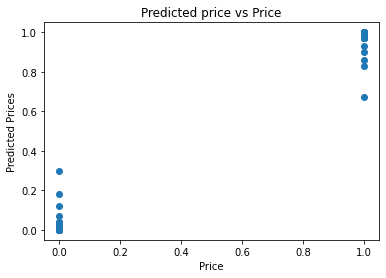

In [35]:
#visulizing the difference between actual prices and the predicted value
y_pred = reg.predict(X_train)
plt.scatter(y_train, y_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Prices')
plt.title('Predicted price vs Price')
plt.show()


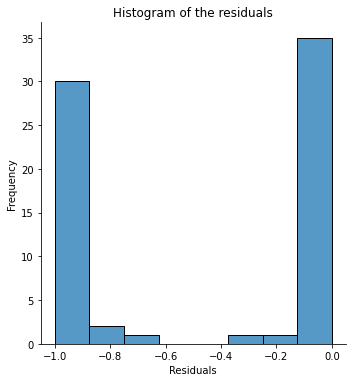

In [36]:
# random forest checking out the normality of the errors:


sns.displot(y_train-y_train-y_pred)
plt.title('Histogram of the residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [37]:
y_test_pred =  reg.predict(X_test)

acc_rf = metrics.r2_score(y_test, y_test_pred)
#random forest model evaluation*
from sklearn import metrics
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2 :', acc_rf)
print('Adjusted R^2:', 1-(1-metrics.r2_score(y_test,y_test_pred))* len((y_test) - 1)/ (len(y_test) - X_test.shape[1]-1))
print('MAE', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_test)))

R^2 : 0.6984932126696832
Adjusted R^2: -0.005022624434389389
MAE 0.12033333333333332
MSE 0.07403666666666667
RMSE 0.0
